## 1) Importing Necessary Liabrary

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## 2) Reading & Understanding Dataset

In [31]:
###Reading Dataset
ds_day = pd.read_csv(r"C:\Users\Dell\Desktop\Bike Sharing Assignment\day.csv")
ds_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
###checking shape/Size of dataset
ds_day.shape

(730, 16)

In [33]:
ds_day.size

11680

In [34]:
###checking information
ds_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [35]:
###gathering description of dataset 
ds_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [36]:
###finding out null values in data
ds_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [37]:
###there are no-null values found in dataset.
###dataset having 730 rows & 16 columns with dtype as integer, float & object(specifically in 'dteday' column).
###11,680 is the size of dataset.

In [38]:
###Drop columns that are not useful for analysis.
###(cnt=casual+registered) column & it is target variable also, hence dropping 'casual' & 'registered' column.
###atemp has high correlation hence dropping.

In [39]:
ds_day.drop(['instant', 'dteday','casual','registered','atemp'],axis=1,inplace=True) 

In [40]:
###now after dropping, let us check new dataset

In [41]:
ds_day.shape

(730, 11)

In [42]:
###columns changed to 11 from 16.

In [43]:
ds_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [44]:
ds_day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [45]:
ds_day.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
hum           594
windspeed     649
cnt           695
dtype: int64

In [46]:
ds_day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


In [47]:
###Renaming for better clarity

In [48]:
ds_day.rename(columns={'mnth':"month","yr":"year","hum":"humidity","cnt":"count","weathersit":"weather_condition","temp":"temperature", "cnt":"total_count"},inplace=True)

In [49]:
Catagorical_data = ['season','year','month','holiday','weekday','workingday','weather_condition']
Numerical_data= ['temperature', 'humidity', 'windspeed',]
Total=['total_count']

In [50]:
# Mapping of the varibles

ds_day["month"]=ds_day.month.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"})

ds_day["season"]=ds_day.season.map({1: "Spring", 2: "summer", 3: "fall", 4: "winter"})

ds_day["weekday"]=ds_day.weekday.map({1:"Mon",2:'Tue',3:"Wed",4:"Thu",5:"Fri",6:"Sat",7:"Sun"})

ds_day["weather_condition"]=ds_day.weather_condition.map({1:"Clear",2:"Few clouds",3:"Light Snow",4:"Snow + Fog"})

## 3) Data Visualisation

## EDA-Univariate Analysis
### Histplot

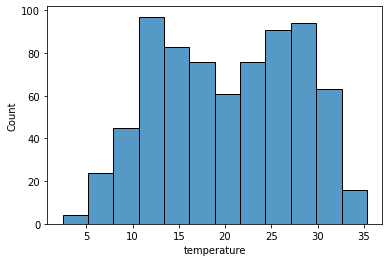

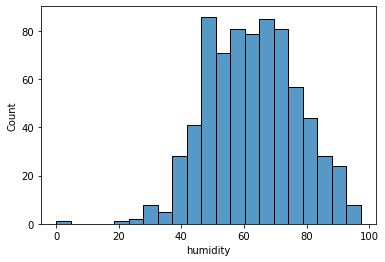

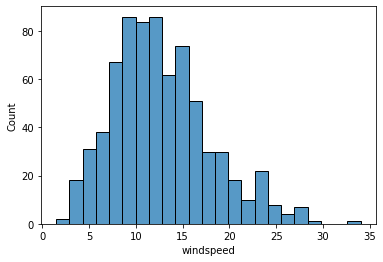

In [51]:
for i in Numerical_data:
    sns.histplot(ds_day[i])
    plt.show()

### Boxplot

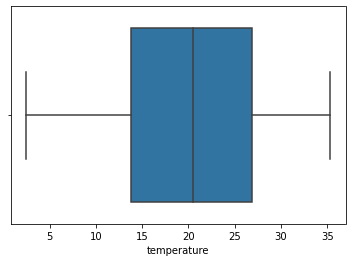

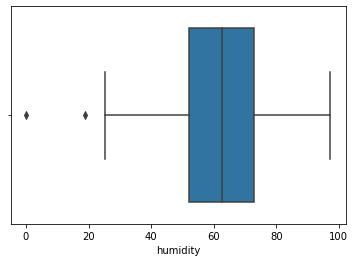

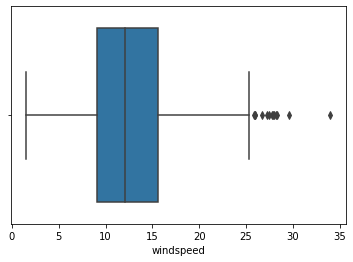

In [52]:
for i in Numerical_data:
    sns.boxplot(ds_day[i])
    plt.show()

### Countplot for Catagorical_data.

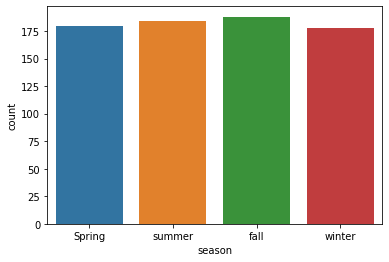

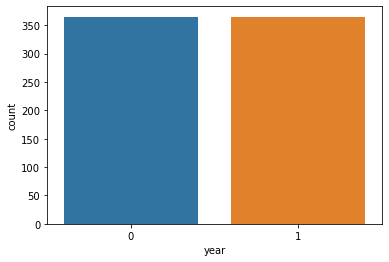

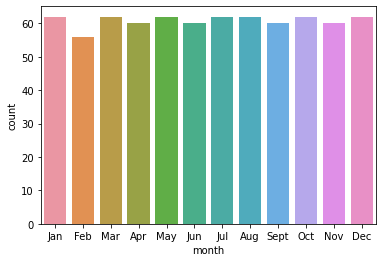

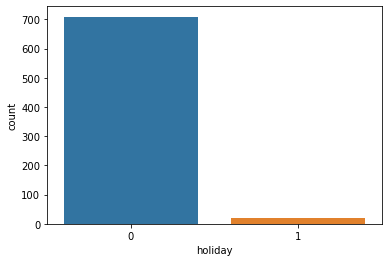

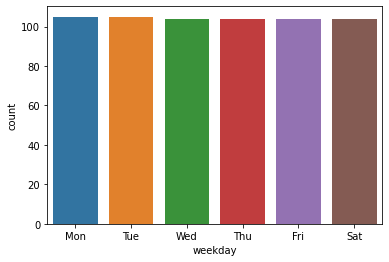

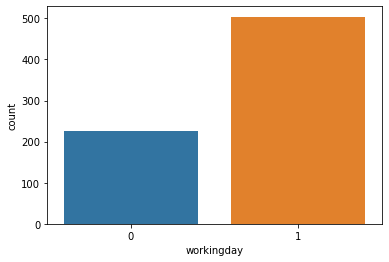

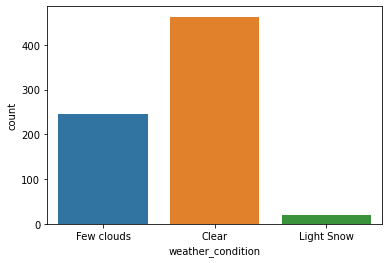

In [53]:
for i in Catagorical_data:
    sns.countplot(ds_day[i])
    plt.show()

### SubPlotting

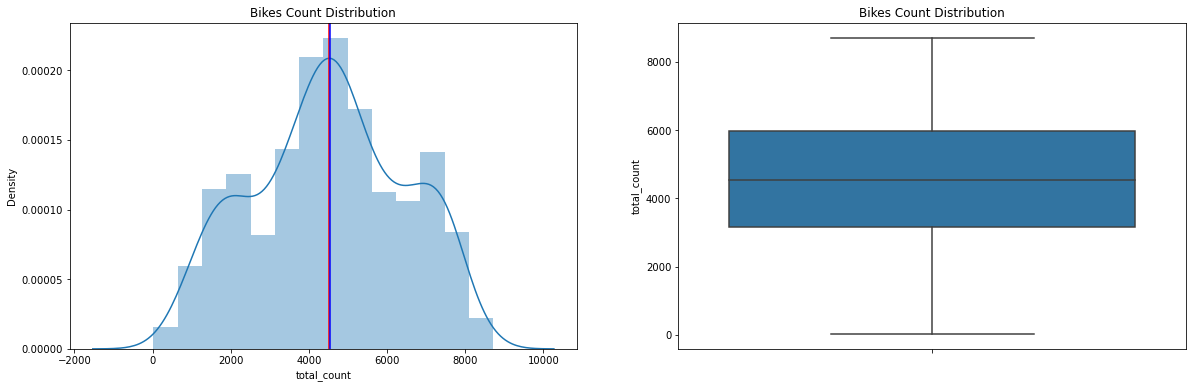

In [54]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Bikes Count Distribution')
sns.distplot(ds_day.total_count)
plt.axvline(ds_day.total_count.mean(), color="r")
plt.axvline(ds_day.total_count.median(), color="b")

plt.subplot(1,2,2)
plt.title('Bikes Count Distribution')
sns.boxplot(y=ds_day.total_count)

plt.show()

In [55]:
###from above graph we can see its Normal_Distribution

## Bivariate Analysis
#### by using pairplot &
#### by using jointplot

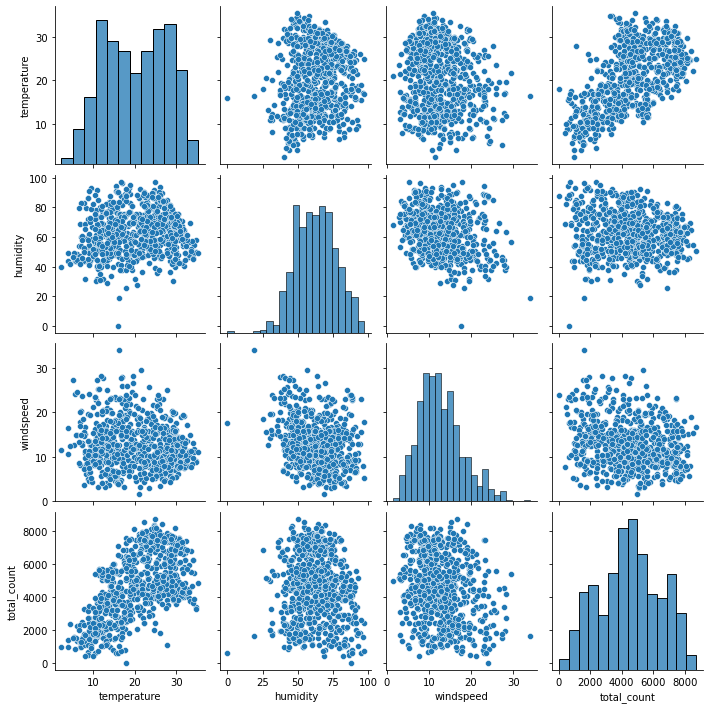

In [56]:
###On Numeric Variable
sns.pairplot(ds_day,vars=['temperature', 'humidity', 'windspeed', 'total_count'])
plt.show()

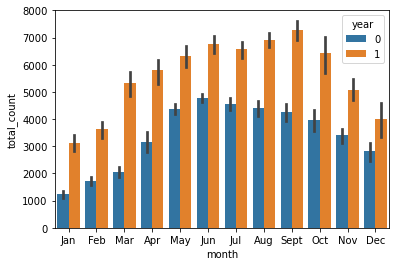

In [57]:
sns.barplot(x="month",y="total_count",hue="year",data=ds_day)
plt.show()

In [58]:
#from the above graph we can conclude that sept month in 2019 have highest count
#while june in 2018 have highes count.

### Joint plot

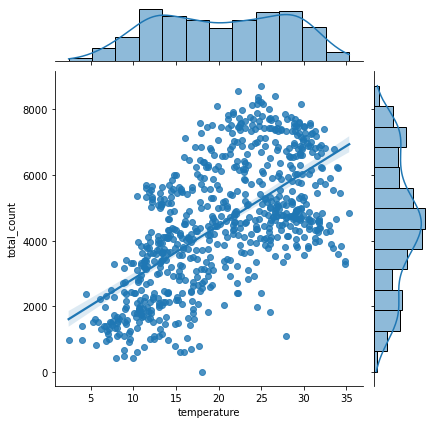

In [59]:
sns.jointplot(x="temperature",y="total_count",data=ds_day,kind="reg")
plt.show()

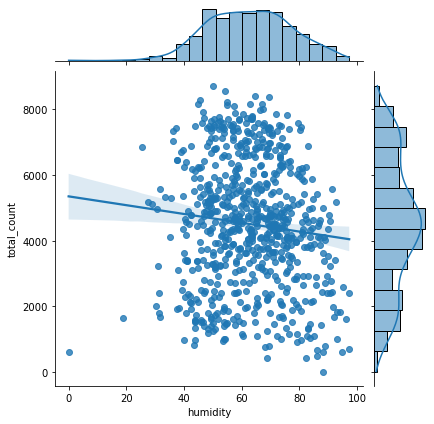

In [60]:
sns.jointplot(x="humidity",y="total_count",data=ds_day,kind="reg")
plt.show()

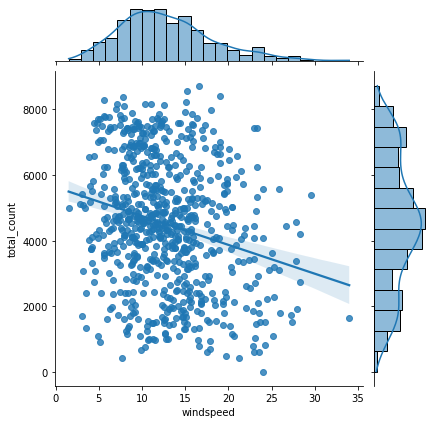

In [61]:
sns.jointplot(x="windspeed",y="total_count",data=ds_day,kind="reg")
plt.show()

### Boxplot of catagorical variable

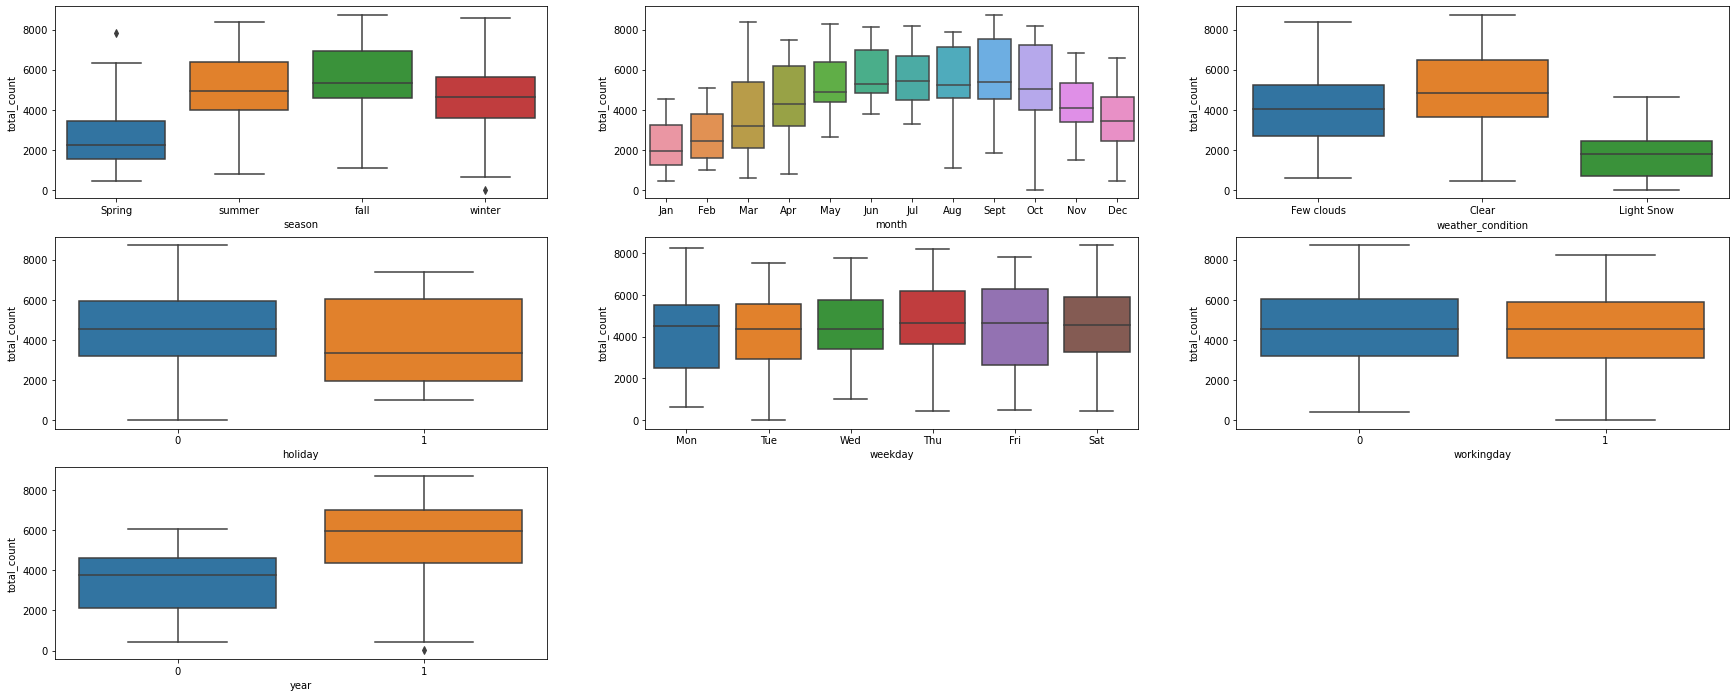

In [62]:
plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'total_count', data = ds_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'month', y = 'total_count', data = ds_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'weather_condition', y = 'total_count', data = ds_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'total_count', data = ds_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'total_count', data = ds_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'total_count', data = ds_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'year', y = 'total_count', data = ds_day)
plt.show()

## Insights Drawn:
#### -"month": September has the highest bike demand, followed by October and August. The month of January has the lowest demand.

#### -"weekday": Bikes demand is more or less consistent throughout the week, with medians that are very close to each other.

#### -"year": Bikes demand was higher in 2019 than in 2018. 

#### -"weather_condition": Demand for rented bikes is highest in Clear FewClouds and lowest in LightSnow LightRain.

#### -"holiday": Bikes are in lower demand over the holidays.

#### -"workingday": We detect no significant differences in bike demand between working and non-working days.

#### -"season": The "Fall" season has the most motorcycles available for rent, followed by "Summer" and "Winter." The "Spring" season -has the fewest amount of hired bikes.

### Heatmap

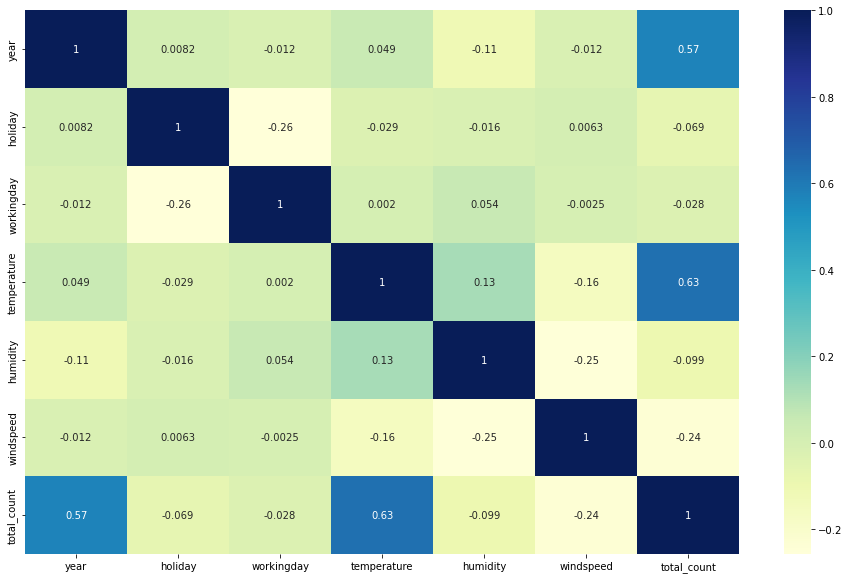

In [63]:
plt.figure(figsize = (16, 10))
sns.heatmap(ds_day.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [64]:
###We can see that only "temperature" and "Year" and significant relation with "total_count".

In [65]:
#_________________________

## 4) DATA PREPARATION

In [66]:
# Creating dummy variables for categorical variable which have more than  2 values - "season", "weekday", "mnth" and "weathersit".

data = pd.get_dummies(ds_day[['season','weekday','month','weather_condition']],drop_first=True)

# concat the dummy dataset with the original "boombikes" dataset

ds_day = pd.concat([ds_day,data], axis = 1)

# we wil now drop the columns 'season','weekday','mnth','weathersit' from the original dataset as their dummies have been created.

ds_day.drop(['season','weekday','month','weather_condition'], axis=1, inplace=True)

# Checking for the changes made

ds_day.head()

,year,holiday,workingday,temperature,humidity,windspeed,total_count,season_fall,season_summer,season_winter,...,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,weather_condition_Few clouds,weather_condition_Light Snow
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
ds_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temperature                   730 non-null    float64
 4   humidity                      730 non-null    float64
 5   windspeed                     730 non-null    float64
 6   total_count                   730 non-null    int64  
 7   season_fall                   730 non-null    uint8  
 8   season_summer                 730 non-null    uint8  
 9   season_winter                 730 non-null    uint8  
 10  weekday_Mon                   730 non-null    uint8  
 11  weekday_Sat                   730 non-null    uint8  
 12  weekday_Thu                   730 non-null    uint8  
 13  weekd

In [68]:
# convert categorical columns back to numeric columns

ds_day[['year','holiday','workingday']]= ds_day[['year','holiday','workingday']].astype('uint8')
ds_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          730 non-null    uint8  
 1   holiday                       730 non-null    uint8  
 2   workingday                    730 non-null    uint8  
 3   temperature                   730 non-null    float64
 4   humidity                      730 non-null    float64
 5   windspeed                     730 non-null    float64
 6   total_count                   730 non-null    int64  
 7   season_fall                   730 non-null    uint8  
 8   season_summer                 730 non-null    uint8  
 9   season_winter                 730 non-null    uint8  
 10  weekday_Mon                   730 non-null    uint8  
 11  weekday_Sat                   730 non-null    uint8  
 12  weekday_Thu                   730 non-null    uint8  
 13  weekd

## 5) Dataset Splitting

In [69]:
from sklearn.model_selection import train_test_split

# spliting the data into 70-30 % 
ds_day_train,ds_day_test=train_test_split(ds_day,train_size=0.7,test_size=0.3,random_state=100)

In [70]:
print(ds_day_test.shape)
print(ds_day_train.shape)

(219, 28)
(510, 28)


## 6) Dataset Scaling

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric_vars = ['temperature','humidity','windspeed','total_count']
ds_day_train[numeric_vars] = scaling.fit_transform(ds_day_train[numeric_vars])

In [72]:
## Test Dataset will always be transfrom

ds_day_test[numeric_vars] = scaling.transform(ds_day_test[numeric_vars])

In [73]:
###Dataset divide into X & Y set.

In [74]:
# Creating X & Y sets
y_train=ds_day_train.pop("total_count")
X_train=ds_day_train

In [75]:
# Test DataFrame

y_test = ds_day_test.pop('total_count')
X_test = ds_day_test

In [76]:
X_train

,year,holiday,workingday,temperature,humidity,windspeed,season_fall,season_summer,season_winter,weekday_Mon,...,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,weather_condition_Few clouds,weather_condition_Light Snow
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0


## 7) Feature Selection & Data Modelling using RFE

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE for Feature selection

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [78]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_fall', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', False, 9),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 3),
 ('weekday_Wed', False, 7),
 ('month_Aug', False, 6),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 12),
 ('month_Mar', False, 13),
 ('month_May', False, 5),
 ('month_Nov', True, 1),
 ('month_Oct', False, 10),
 ('month_Sept', True, 1),
 ('weather_condition_Few clouds', True, 1),
 ('weather_condition_Light Snow', True, 1)]

In [79]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temperature', 'humidity', 'windspeed',
       'season_fall', 'season_summer', 'season_winter', 'month_Dec',
       'month_Jan', 'month_Jul', 'month_Nov', 'month_Sept',
       'weather_condition_Few clouds', 'weather_condition_Light Snow'],
      dtype='object')

## Inference:

#### -We have successfully evaluated top 15 predictors which will impact our outcome, through RFE approach but we will not rely on these 15 features, as there might be some features which is insignificant. 
#### -Hence, we will validate these 15 features, through Linear Model building while dropping the insignificant features.

## 8) Now, Building Linear Model:

#### -We will be building Linear Model using 'Stats Model'.

#### -Here, we will build Linear Models, to analyze the multicollinearity between the predictors and significant p-values of the predictors.

In [80]:
# Importing Stats Model Libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## MODEL 1

In [81]:
X_train_rfe=X_train[col]

In [82]:
# adding a constant
X_train_rfe1=sm.add_constant(X_train_rfe)

In [83]:
# Creating a best fitted model
lr=sm.OLS(y_train,X_train_rfe1).fit()

In [654]:
# Printing summary of the linear regression model obtained

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          3.34e-189
Time:                        15:36:16   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## VIF Check:

### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

### The formula for calculating VIF is:
### 𝑉𝐼𝐹𝑖=1/(1−𝑅𝑖^2)

In [656]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temperature,27.14
3,humidity,21.12
5,season_fall,7.52
7,season_winter,4.07
4,windspeed,3.73
6,season_summer,3.65
13,weather_condition_Few clouds,2.19
0,year,2.05
11,month_Nov,1.89
9,month_Jan,1.63


In [84]:
X_train_new = X_train_rfe.drop('humidity',1)

In [85]:
# Checking the parameters obtained

lr.params

const                           0.258507
year                            0.230328
holiday                        -0.091228
temperature                     0.479977
humidity                       -0.160227
windspeed                      -0.188457
season_fall                     0.061737
season_summer                   0.102503
season_winter                   0.165171
month_Dec                      -0.037199
month_Jan                      -0.043748
month_Jul                      -0.055495
month_Nov                      -0.040949
month_Sept                      0.074891
weather_condition_Few clouds   -0.055876
weather_condition_Light Snow   -0.248116
dtype: float64

## Model 2

In [86]:
X_train_new = sm.add_constant(X_train_new)
Model_2 = sm.OLS(y_train,X_train_new).fit()
print(Model_2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.57e-186
Time:                        22:33:21   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [87]:
###checking VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temperature,27.14
3,humidity,21.12
5,season_fall,7.52
7,season_winter,4.07
4,windspeed,3.73
6,season_summer,3.65
13,weather_condition_Few clouds,2.19
0,year,2.05
11,month_Nov,1.89
9,month_Jan,1.63


## Model 3

In [88]:
X_train_new = X_train_new.drop(['month_Nov'],1)
X_train_lm = sm.add_constant(X_train_new)
Model_3 = sm.OLS(y_train,X_train_lm).fit() 
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.20e-186
Time:                        22:33:22   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [89]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.07
5,season_fall,5.30
3,temperature,3.83
6,season_summer,2.74
7,season_winter,2.24
9,month_Jan,1.64
10,month_Jul,1.48
11,month_Sept,1.29
8,month_Dec,1.25
4,windspeed,1.12


## Model 4

In [90]:
X_train_new = X_train_new.drop(['month_Jan'],1)
X_train_lm = sm.add_constant(X_train_new)
Model_4 = sm.OLS(y_train,X_train_lm).fit() 
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.20e-186
Time:                        22:33:23   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [91]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,18.45
5,season_fall,5.24
3,temperature,3.49
6,season_summer,2.55
7,season_winter,1.97
9,month_Jul,1.48
10,month_Sept,1.29
8,month_Dec,1.19
4,windspeed,1.10
12,weather_condition_Light Snow,1.05


## Model 5

In [92]:
X_train_new = X_train_new.drop(['month_Jul'],1)
X_train_lm = sm.add_constant(X_train_new)
Model_5 = sm.OLS(y_train,X_train_lm).fit() 
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.20e-186
Time:                        22:33:23   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [93]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,18.37
5,season_fall,5.03
3,temperature,3.42
6,season_summer,2.53
7,season_winter,1.97
8,month_Dec,1.19
9,month_Sept,1.18
4,windspeed,1.10
11,weather_condition_Light Snow,1.05
10,weather_condition_Few clouds,1.04


In [94]:
lr.params

const                           0.258507
year                            0.230328
holiday                        -0.091228
temperature                     0.479977
humidity                       -0.160227
windspeed                      -0.188457
season_fall                     0.061737
season_summer                   0.102503
season_winter                   0.165171
month_Dec                      -0.037199
month_Jan                      -0.043748
month_Jul                      -0.055495
month_Nov                      -0.040949
month_Sept                      0.074891
weather_condition_Few clouds   -0.055876
weather_condition_Light Snow   -0.248116
dtype: float64

## 9) Residual Analysis

In [95]:
y_train_cnt = Model_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

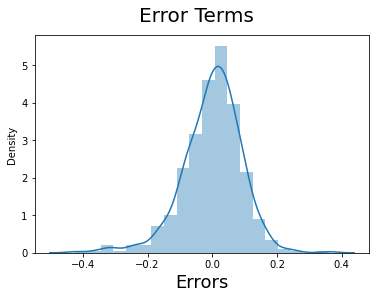

In [96]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)            
plt.xlabel('Errors', fontsize = 18)

In [97]:
#In the above visualization we can see that it is normal distribution with mean=0

In [98]:
# Prediction for the test dataset

In [99]:
ds_day.head()

,year,holiday,workingday,temperature,humidity,windspeed,total_count,season_fall,season_summer,season_winter,...,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sept,weather_condition_Few clouds,weather_condition_Light Snow
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [100]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const', axis= 1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = Model_5.predict(X_test_new)

## 10) Model Evaluation

Text(0, 0.5, 'y_pred')

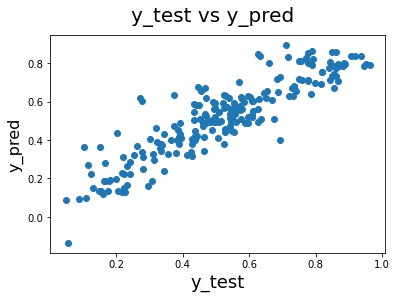

In [101]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

In [102]:
# Evaluating on the test dataset
from sklearn.metrics import r2_score

test_r2 = r2_score(y_true = y_test, y_pred = y_pred)
print("R Squared for Test dataset: ", round(test_r2,3))

R Squared for Test dataset:  0.807


## 11) Final Model

In [103]:
final_model = Model_5

final_variable = list(final_model.params.index)
final_variable.remove('const')

print(f'Final Selection of Variable: {final_variable}')

# We will print the coefficents of final varible now

print('\033[1m{:10s}\033[0m'.format('\nCoefficents of the variables are:'))
print(round(final_model.params,3))

Final Selection of Variable: ['year', 'holiday', 'temperature', 'windspeed', 'season_fall', 'season_summer', 'season_winter', 'month_Dec', 'month_Sept', 'weather_condition_Few clouds', 'weather_condition_Light Snow']

Coefficents of the variables are:
const                           0.141
year                            0.234
holiday                        -0.098
temperature                     0.470
windspeed                      -0.151
season_fall                     0.057
season_summer                   0.116
season_winter                   0.155
month_Dec                      -0.021
month_Sept                      0.089
weather_condition_Few clouds   -0.080
weather_condition_Light Snow   -0.288
dtype: float64


In [104]:
## Adjusted R squared
N= len(X_test)        # sample size
p =len(final_variable)     # Number of independent variable
r2_test_adj = round((1-((1-test_r2)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.796


In [105]:
## Mean Squared Error
from sklearn.metrics import mean_squared_error 

mse = mean_squared_error(y_test, y_pred)
print("Mean_Squared_Error : ",round(mse,4))

Mean_Squared_Error :  0.0092


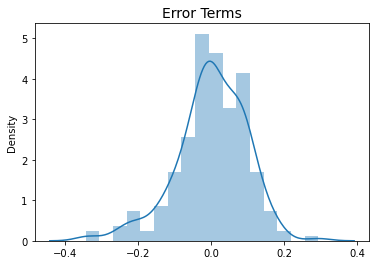

In [106]:
# We will now plot the distribution plot for "res_test" as:

res_test = y_test - y_pred
plt.title('Error Terms', fontsize=14) 
sns.distplot(res_test);

In [107]:
print('R Sqaured train : ', round(final_model.rsquared, 2), '  Adjusted R Squared train:', round(final_model.rsquared_adj, 3) )
print('R Sqaured test : ', round(test_r2, 2), '  Adjusted R Squared test :', round(r2_test_adj,3))

# We will now display values of the coefficents of final varible

print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(final_model.params,3))

R Sqaured train :  0.83   Adjusted R Squared train: 0.83
R Sqaured test :  0.81   Adjusted R Squared test : 0.796

Coefficent for the variables are:
const                           0.141
year                            0.234
holiday                        -0.098
temperature                     0.470
windspeed                      -0.151
season_fall                     0.057
season_summer                   0.116
season_winter                   0.155
month_Dec                      -0.021
month_Sept                      0.089
weather_condition_Few clouds   -0.080
weather_condition_Light Snow   -0.288
dtype: float64


# This model is more than 80% accurate i.e., 83%.

### The variables' coefficients explain the factors influencing bike demand.

### Temperature (temp), weathersit LightSnow LightRain, and Year were discovered to be the top parameters on which bike demand is dependent (yr).

### These variables should be prioritised in order to increase bike demand.

## For the best fit line here, the equation is:
#### Target variable(cnt) = 0.226 + (0.234 x year) - (0.098 x holiday) + (0.470 x temparature) - (0.151 x windspeed) + (0.057 x season_fall)+ (0.116 x season_summer)+ (0.155 x season_winter) -(month_Dec x 0.021) + (month_Sep x 0.089) - (weather_condition_Few clouds x 0.080) - (weather_condition_Light Snow x 0.288)